In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data = np.column_stack((fish_length, fish_weight))#zip 어쩌구 numpy에서 구현

In [4]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))#배열 연결

In [8]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [11]:
print(train_input.shape, test_input.shape)#2차원배열

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)#1차원배열

(36,) (13,)


In [14]:
print(test_target)#별로 일정하지 않음

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [15]:
#일정하지 않게 무작위로 나눠졌을 때 stratify 매개 변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눠줌.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [16]:
print(test_target)#일정하게 됨

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

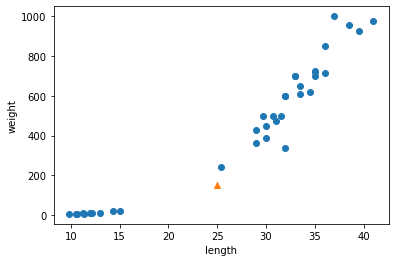

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
#가장 가까운 이웃을 찾아주는 kneighbors()
distances, indexes  = kn.kneighbors([[25,150]])

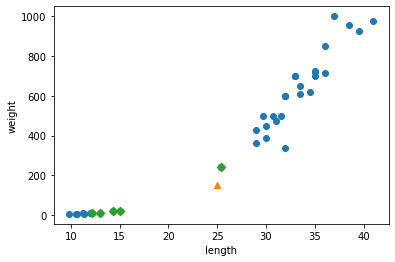

In [28]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


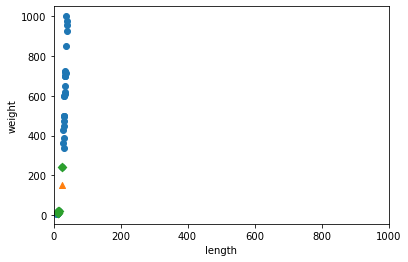

In [31]:
#범위 맞추기
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
#데이터 전처리: 특성값을 일정한 기준으로 맞춰주어야 함.

In [33]:
#평균
mean = np.mean(train_input, axis = 0)
#표준편차
std = np.std(train_input, axis = 0)

In [36]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [37]:
train_scaled = (train_input -mean)/std

In [38]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

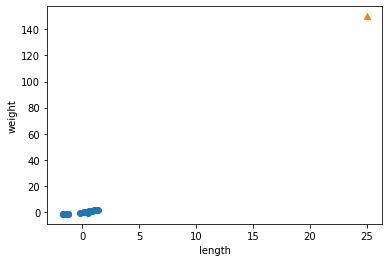

In [39]:
#전처리 데이터로 모델 훈련하기
#샘플 변환 x
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

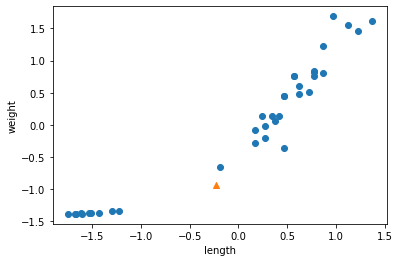

In [42]:
#동일한 기준으로 샘플 변환 이후 다시 산점도 그림
#x축과 y축의 범위가 -1.5~1.5 사이로 바뀜
new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [44]:
#테스트 세트의 스케일도 변환해야 함

In [46]:
test_scaled =(test_input - mean)/std

In [47]:
kn.score(test_scaled, test_target)

1.0

In [48]:
print(kn.predict([new]))

[1.]


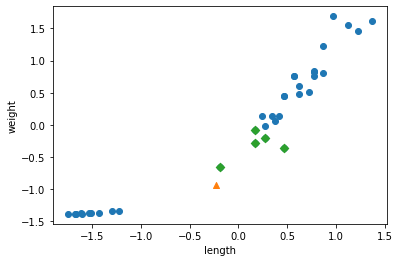

In [50]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()